In [1]:
# les packages necessaires
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('train.csv')

X = df.values


In [3]:
maliste = []
N = 10
# On va prendre les valeurs toutes les N secondes
for i in range(11*(N-1) + 1,15841,11*N):
    maliste = maliste + list(range(i,i+11))

In [4]:
X = X[:,maliste]

In [5]:
dfy = pd.read_csv('challenge_output_data_training_file_nba_challenge.csv',sep=';')
Y = dfy.values
Y = Y[:,1]

In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)

In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39


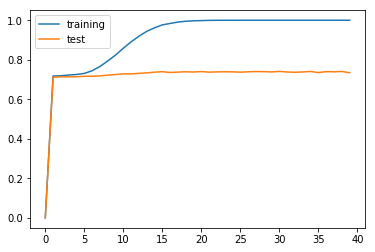

In [10]:
N = 40
accuracy_train = np.zeros((N))
accuracy_test = np.zeros((N))
for i in range(1,N):
    print(i)
    rfc = RandomForestClassifier(n_estimators = 2500,max_depth= i)
    rfc.fit(X_train,Y_train)
    accuracy_train[i] = accuracy_score(Y_train,rfc.predict(X_train))
    predictions = rfc.predict(X_test)
    accuracy_test[i] = accuracy_score(Y_test,predictions)
plt.plot(accuracy_train,label = 'training')
plt.plot(accuracy_test, label = 'test')
plt.legend()

In [11]:
print(accuracy_test.max())
print(accuracy_test.argmax())

0.7412559618441972
30


In [7]:
# Learning random forest on the whole data set
RandomForestAll = RandomForestClassifier(n_estimators = 5000,max_depth=30)
RandomForestAll.fit(X,Y)
dfTest = pd.read_csv('test.csv')
X_Test_All = dfTest.values
X_Test_All = X_Test_All[:,maliste]
Y_pred_test = RandomForestAll.predict(X_Test_All)
print(Y_pred_test)

[0 0 0 ... 1 0 1]


In [10]:
X_entier = dfTest.values
Y_essai = np.array([X_entier[:,0],Y_pred_test])
Y_essai = Y_essai.T
np.savetxt('essai10Seconds5000RandomForest30Depth.csv', Y_essai, delimiter=';',fmt='%i', header="ID;label")

In [12]:
Y_essai.shape

(4192, 2)